In [1]:
using PyPlot, DataArrays, DataFrames

INFO: Loading help data...


In [2]:
;cat time_vs_numprocLargeIm/times_* > times_L.dat && cat time_vs_numprocMediumIm/times_* > times_M.dat && cat time_vs_numprocSmallIm/times_* > times_S.dat

In [3]:
;ls

Untitled.ipynb
basecase
basecase.c
basecase.pbs
cio.c
clean
printims
runscript
time_vs_numprocLargeIm
time_vs_numprocMediumIm
time_vs_numprocSmallIm
times_L.dat
times_M.dat
times_S.dat


In [4]:
Small = readtable("times_S.dat",header = false)
Medium = readtable("times_M.dat",header = false)
Large = readtable("times_L.dat",header = false)

,x1,x2,x3,x4
1,12,0.251763,6.8e-5,1.5e-5
2,16,0.207194,5.6e-5,1.5e-5
3,18,0.194042,5.2e-5,1.1e-5
4,24,0.137366,3.7e-5,1.1e-5
5,3,0.982083,0.000265,5.0e-6
6,4,0.626088,0.000169,1.0e-5
7,6,0.452639,0.000122,1.0e-5
8,8,0.349722,9.5e-5,1.0e-5


In [5]:
Small = sort(Small,cols = :x1)
Medium = sort(Medium,cols = :x1)
Large = sort(Large,cols = :x1)

,x1,x2,x3,x4
1,3,0.982083,0.000265,5.0e-6
2,4,0.626088,0.000169,1.0e-5
3,6,0.452639,0.000122,1.0e-5
4,8,0.349722,9.5e-5,1.0e-5
5,12,0.251763,6.8e-5,1.5e-5
6,16,0.207194,5.6e-5,1.5e-5
7,18,0.194042,5.2e-5,1.1e-5
8,24,0.137366,3.7e-5,1.1e-5


In [6]:
Small[:compercent] = Small[:x4]./Small[:x3]
Medium[:compercent] = Medium[:x4]./Medium[:x3]
Large[:compercent] = Large[:x4]./Large[:x3]

8-element DataArray{Float64,1}:
 0.0188679
 0.0591716
 0.0819672
 0.105263 
 0.220588 
 0.267857 
 0.211538 
 0.297297 

In [7]:
Small[:speedup] = Small[1,:x3]./Small[:x3]
Medium[:speedup] = Medium[1,:x3]./Medium[:x3]
Large[:speedup] = Large[1,:x3]./Large[:x3]

8-element DataArray{Float64,1}:
 1.0    
 1.56805
 2.17213
 2.78947
 3.89706
 4.73214
 5.09615
 7.16216

In [8]:
Small

,x1,x2,x3,x4,compercent,speedup
1,3,0.034168,1.1e-5,4.0e-6,0.36363636363636365,1.0
2,4,0.038826,1.3e-5,6.0e-6,0.46153846153846156,0.8461538461538461
3,6,0.034582,1.1e-5,7.0e-6,0.6363636363636364,1.0
4,8,0.033091,1.1e-5,7.0e-6,0.6363636363636364,1.0
5,12,0.029682,1.1e-5,9.0e-6,0.8181818181818182,1.0
6,16,0.037674,1.2e-5,1.0e-5,0.8333333333333334,0.9166666666666666
7,18,0.029651,1.1e-5,9.0e-6,0.8181818181818182,1.0
8,24,0.037472,1.2e-5,1.0e-5,0.8333333333333334,0.9166666666666666


In [9]:
Medium

,x1,x2,x3,x4,compercent,speedup
1,3,0.228902,7.3e-5,4.0e-6,0.0547945205479452,1.0
2,4,0.193307,6.1e-5,8.0e-6,0.13114754098360656,1.1967213114754098
3,6,0.140043,4.4e-5,8.0e-6,0.18181818181818182,1.6590909090909092
4,8,0.106853,3.4e-5,1.0e-5,0.29411764705882354,2.1470588235294117
5,12,0.083949,2.7e-5,1.0e-5,0.3703703703703704,2.7037037037037037
6,16,0.073081,2.3e-5,1.0e-5,0.4347826086956522,3.1739130434782608
7,18,0.068211,2.2e-5,1.1e-5,0.5,3.3181818181818183
8,24,0.061908,2.0e-5,1.1e-5,0.5499999999999999,3.6499999999999995


In [10]:
Large

,x1,x2,x3,x4,compercent,speedup
1,3,0.982083,0.000265,5.0e-6,0.01886792452830189,1.0
2,4,0.626088,0.000169,1.0e-5,0.059171597633136105,1.5680473372781065
3,6,0.452639,0.000122,1.0e-5,0.0819672131147541,2.1721311475409837
4,8,0.349722,9.5e-5,1.0e-5,0.10526315789473685,2.789473684210526
5,12,0.251763,6.8e-5,1.5e-5,0.22058823529411764,3.8970588235294117
6,16,0.207194,5.6e-5,1.5e-5,0.26785714285714285,4.732142857142857
7,18,0.194042,5.2e-5,1.1e-5,0.21153846153846154,5.096153846153847
8,24,0.137366,3.7e-5,1.1e-5,0.2972972972972973,7.162162162162162


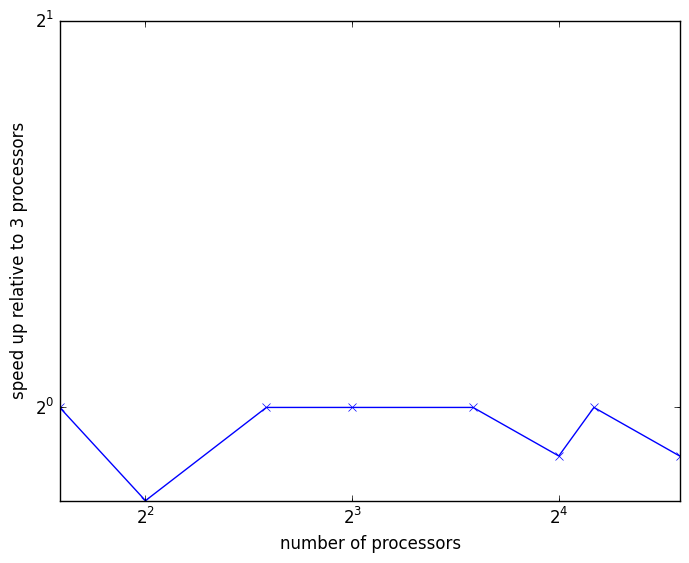

PyObject <matplotlib.text.Text object at 0x11ae02890>

In [35]:
loglog(Small[:x1],Small[:speedup],basey=2,basex=2,"-x")
ylim(0,2)
xlim(3,24)
ylabel("speed up relative to 3 processors")
xlabel("number of processors")

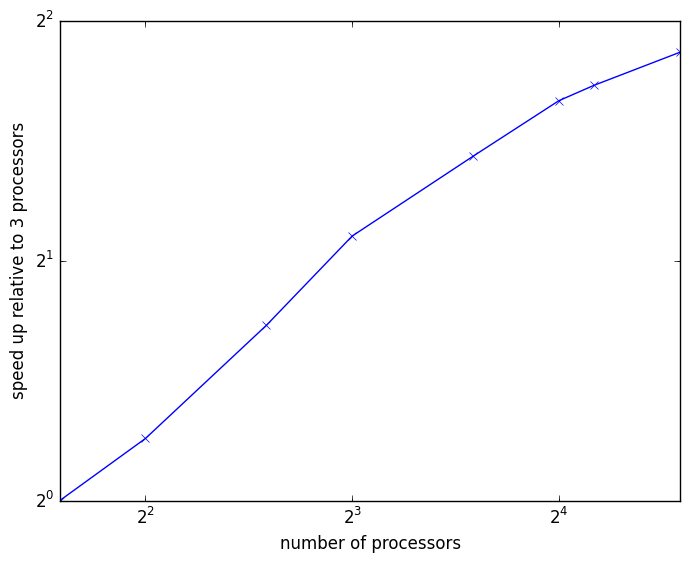

PyObject <matplotlib.text.Text object at 0x11abe8950>

In [34]:
loglog(Medium[:x1],Medium[:speedup],basey=2,basex=2,"-x")
ylim(0,4)
xlim(3,24)
ylabel("speed up relative to 3 processors")
xlabel("number of processors")

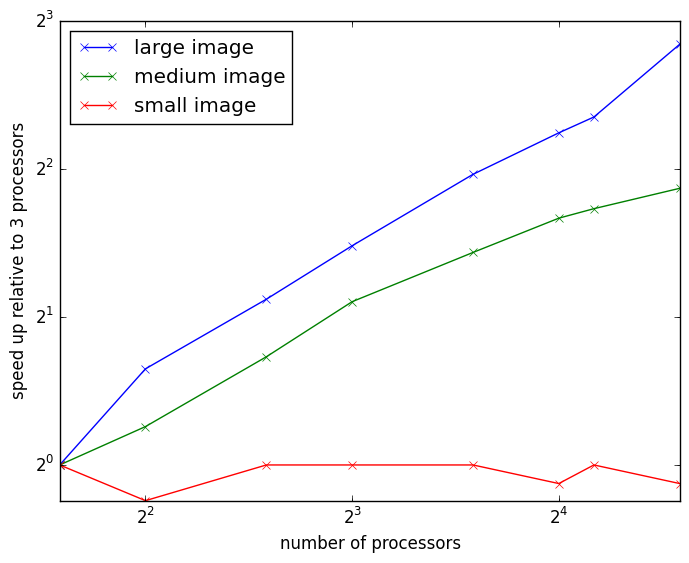

PyObject <matplotlib.legend.Legend object at 0x11bb72dd0>

In [40]:
loglog(Large[:x1],Large[:speedup],basey=2,basex=2,"-x",label="large image")
loglog(Medium[:x1],Medium[:speedup],basey=2,basex=2,"-x",label="medium image")
loglog(Small[:x1],Small[:speedup],basey=2,basex=2,"-x",label="small image")
ylim(0,8)
xlim(3,24)
ylabel("speed up relative to 3 processors")
xlabel("number of processors")
legend(loc = 0)

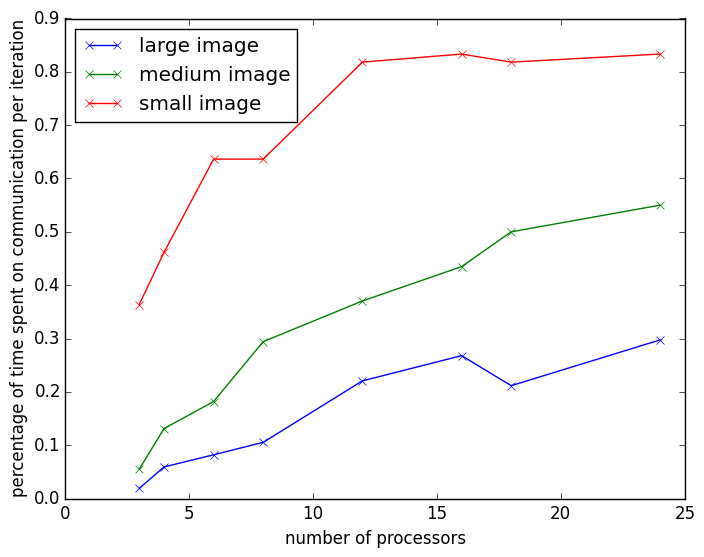

PyObject <matplotlib.legend.Legend object at 0x11b228110>

In [36]:
plot(Large[:x1],Large[:compercent],"-x",label="large image")
plot(Medium[:x1],Medium[:compercent],"-x",label="medium image")
plot(Small[:x1],Small[:compercent],"-x",label="small image")
ylabel("percentage of time spent on communication per iteration")
xlabel("number of processors")
legend(loc = 0)

In [51]:
;ls time_vs_numprocLargeIm/out*

time_vs_numprocLargeIm/out_12.dat
time_vs_numprocLargeIm/out_16.dat
time_vs_numprocLargeIm/out_18.dat
time_vs_numprocLargeIm/out_24.dat
time_vs_numprocLargeIm/out_3.dat
time_vs_numprocLargeIm/out_4.dat
time_vs_numprocLargeIm/out_6.dat
time_vs_numprocLargeIm/out_8.dat


In [53]:
P3 = readtable("time_vs_numprocLargeIm/out_3.dat",header = true)
P4 = readtable("time_vs_numprocLargeIm/out_4.dat",header = true)
P6 = readtable("time_vs_numprocLargeIm/out_6.dat",header = true)
P8 = readtable("time_vs_numprocLargeIm/out_8.dat",header = true)
P12 = readtable("time_vs_numprocLargeIm/out_12.dat",header = true)
P16 = readtable("time_vs_numprocLargeIm/out_16.dat",header = true)
P18 = readtable("time_vs_numprocLargeIm/out_18.dat",header = true)
P24L = readtable("time_vs_numprocLargeIm/out_24.dat",header = true)

,itter,avg,del
1,126.25,0,254.866943
2,1.804108,50,253.118378
3,0.909409,100,252.263245
4,0.629944,150,251.607285
5,0.510483,200,251.055008
6,0.42366,250,250.569016
7,0.358749,300,250.129883
8,0.30925,350,249.726242
9,0.270523,400,249.350723
10,0.239929,450,248.998108


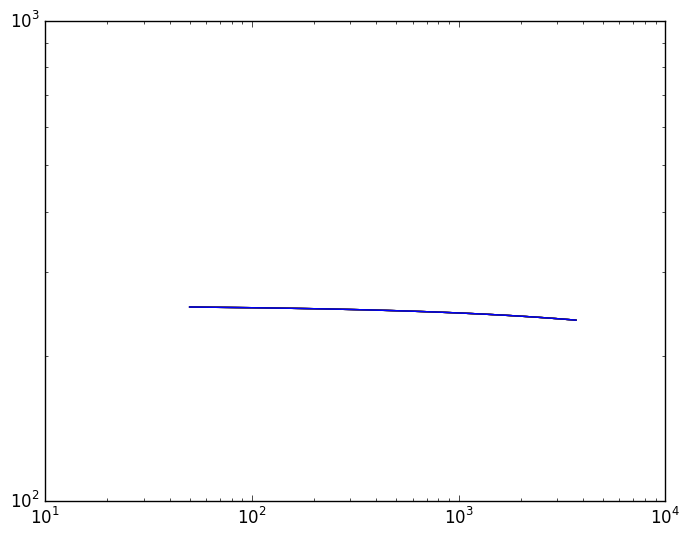

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x11cf5acd0>

In [66]:
loglog(P3[:avg],P3[:del])
loglog(P4[:avg],P4[:del]) ## -> check on correctness more or less equal
loglog(P6[:avg],P6[:del])
loglog(P8[:avg],P8[:del])
loglog(P12[:avg],P12[:del])
loglog(P16[:avg],P16[:del])
loglog(P18[:avg],P18[:del])
loglog(P24[:avg],P24[:del])

In [67]:
P24L = readtable("time_vs_numprocLargeIm/out_24.dat",header = true)
P24M = readtable("time_vs_numprocMediumIm/out_24.dat",header = true)
P24S = readtable("time_vs_numprocSmallIm/out_24.dat",header = true)

,itter,avg,del
1,92.0,0,254.045654
2,1.64624,50,241.573959
3,0.881058,100,235.561508
4,0.644608,150,230.988373
5,0.543198,200,227.167603
6,0.459152,250,223.832031
7,0.389694,300,220.844452
8,0.332062,350,218.122849
9,0.300171,400,215.613556
10,0.273697,450,213.278915


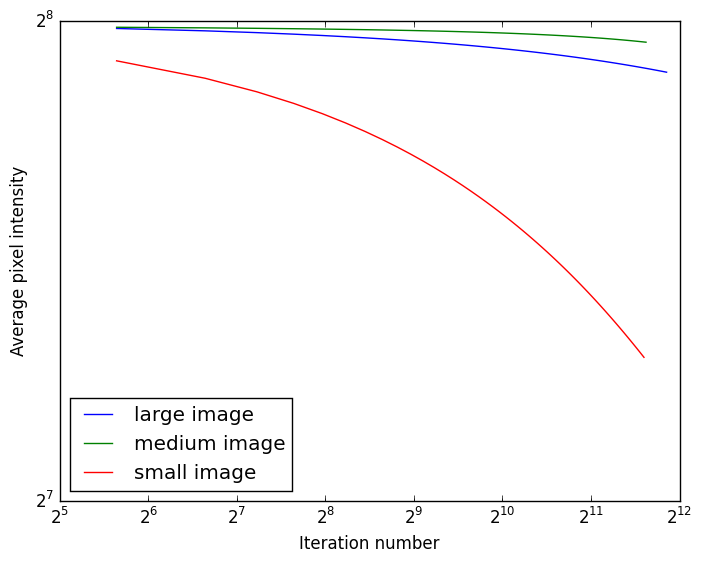

PyObject <matplotlib.text.Text object at 0x11f65f910>

In [83]:
loglog(P24L[:avg],P24L[:del],basex=2,basey=2,label = "large image")
loglog(P24M[:avg],P24M[:del],basex=2,basey=2,label = "medium image")
loglog(P24S[:avg],P24S[:del],basex=2,basey=2,label = "small image")
legend(loc=0)
ylabel("Average pixel intensity")
xlabel("Iteration number")